# ioNERDSS Python Package Tutorial for Single-species Assembly

## 1. Setup NERDSS

Clone NERDSS repository from Github (https://github.com/mjohn218/nerdss_development). Refer to the user guide and install NERDSS on local device. After installation NERDSS, a executable file named 'nerdss.exe' will be found.

## 2. Setup Self-assembly Model for Platonic Solid (Dodecahedron as Example)

### 2.1 Platonic Solid

Platonic solid is a series of 3-dimensional geometry solid that each face is congruent and all faces are regular polygons. Besides, same number of faces will meet at each vertex. The platonic solids can be considered as the most regular 3-D solids because all of their properties are regular. The length of each edge, the angle between each edge and between each face are all identical. There are 5 kinds of Platonic solids existing and dodecahedron will be introduced as an example.

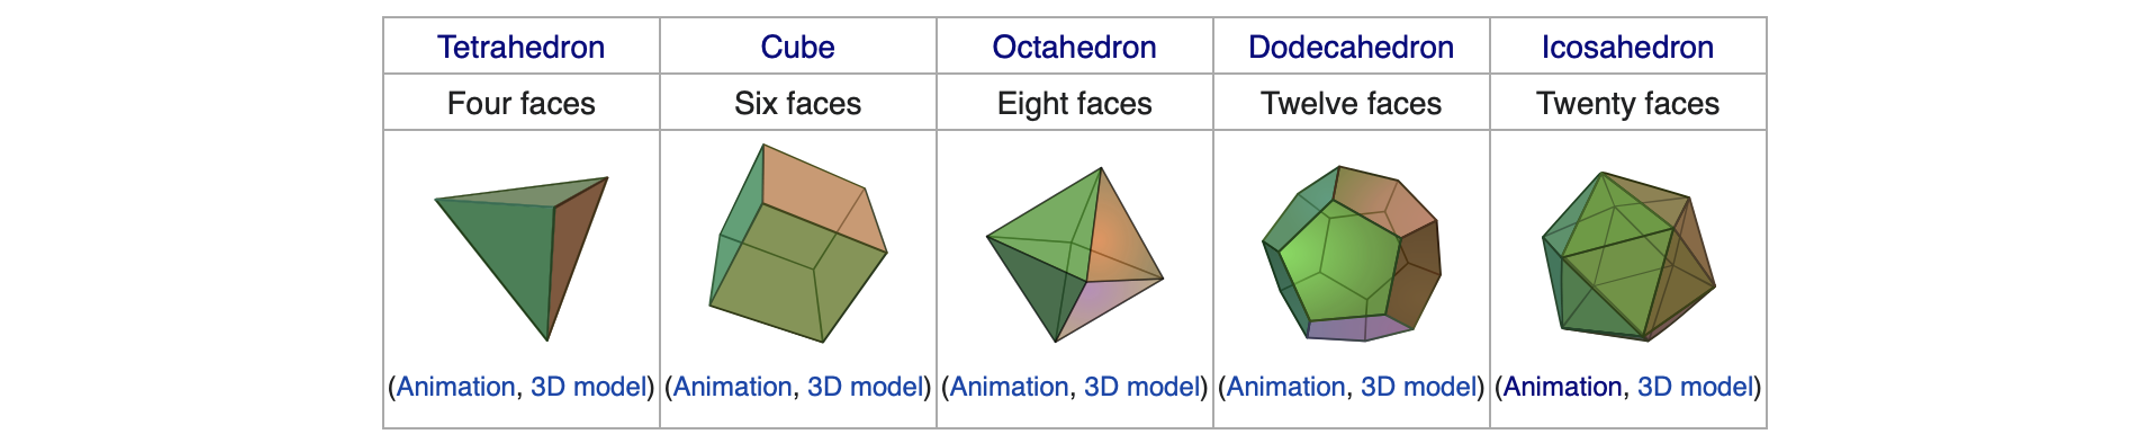

### 2.2 Coordinates of each Vertex

Dodecahedron possesses 12 faces, 20 vertex and 30 edges. The coordinates of each vertex is given as follows:

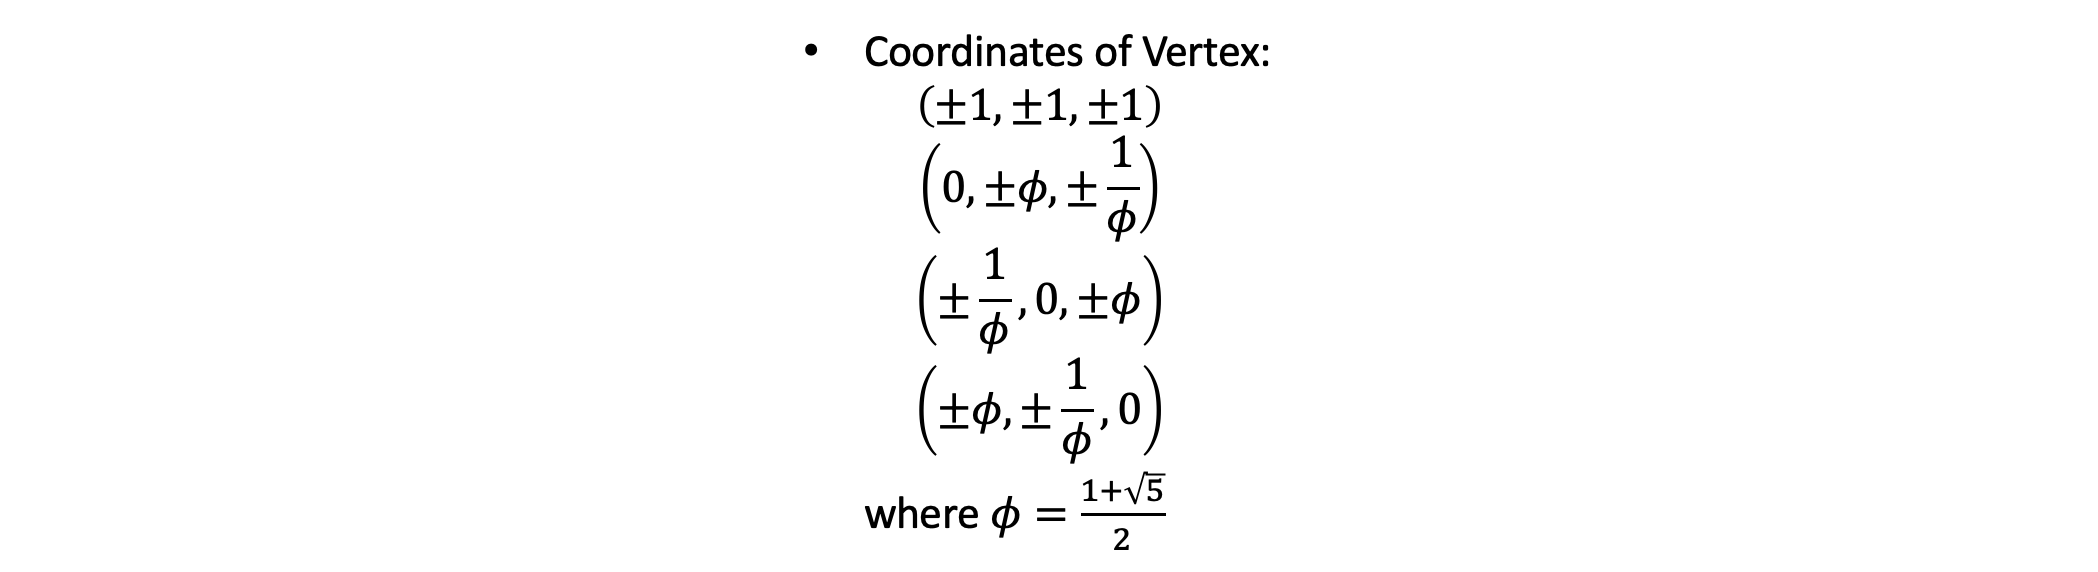

By simply multiplying the above coordinates by a fixed factor, the effect of changing the size of the model in equal proportions can be achieved, thus allowing the diameter of the model to be adjusted.

### 2.3 Location of Monomer

For a self-assembly model, the center-of-mass(COM) can be located either in the center of each face or at each vertex for dodecahedron. The face-centered COM will be discussed here because more calculation is involved for this model.

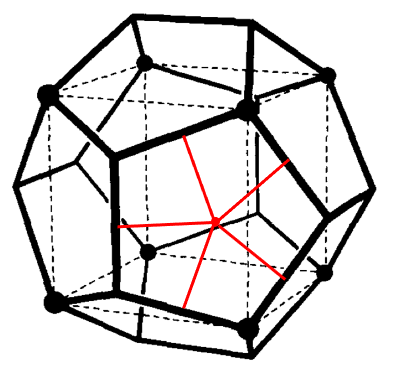

For a dodecahedron with face-centered COM, each monomer will occupy one single face and the COM of each monomer is in the center of each face. Also, each reacting interface is in the middle point of each edge when sigma is ignored for now. Therefore the next step will be calculate the coordinates of each COM and their corresponding legs.

### 2.4 Center Point of each Face

For a regular pentagon, the coordinates of its five vertices are known, where the point coordinates can be derived by the following calculation.

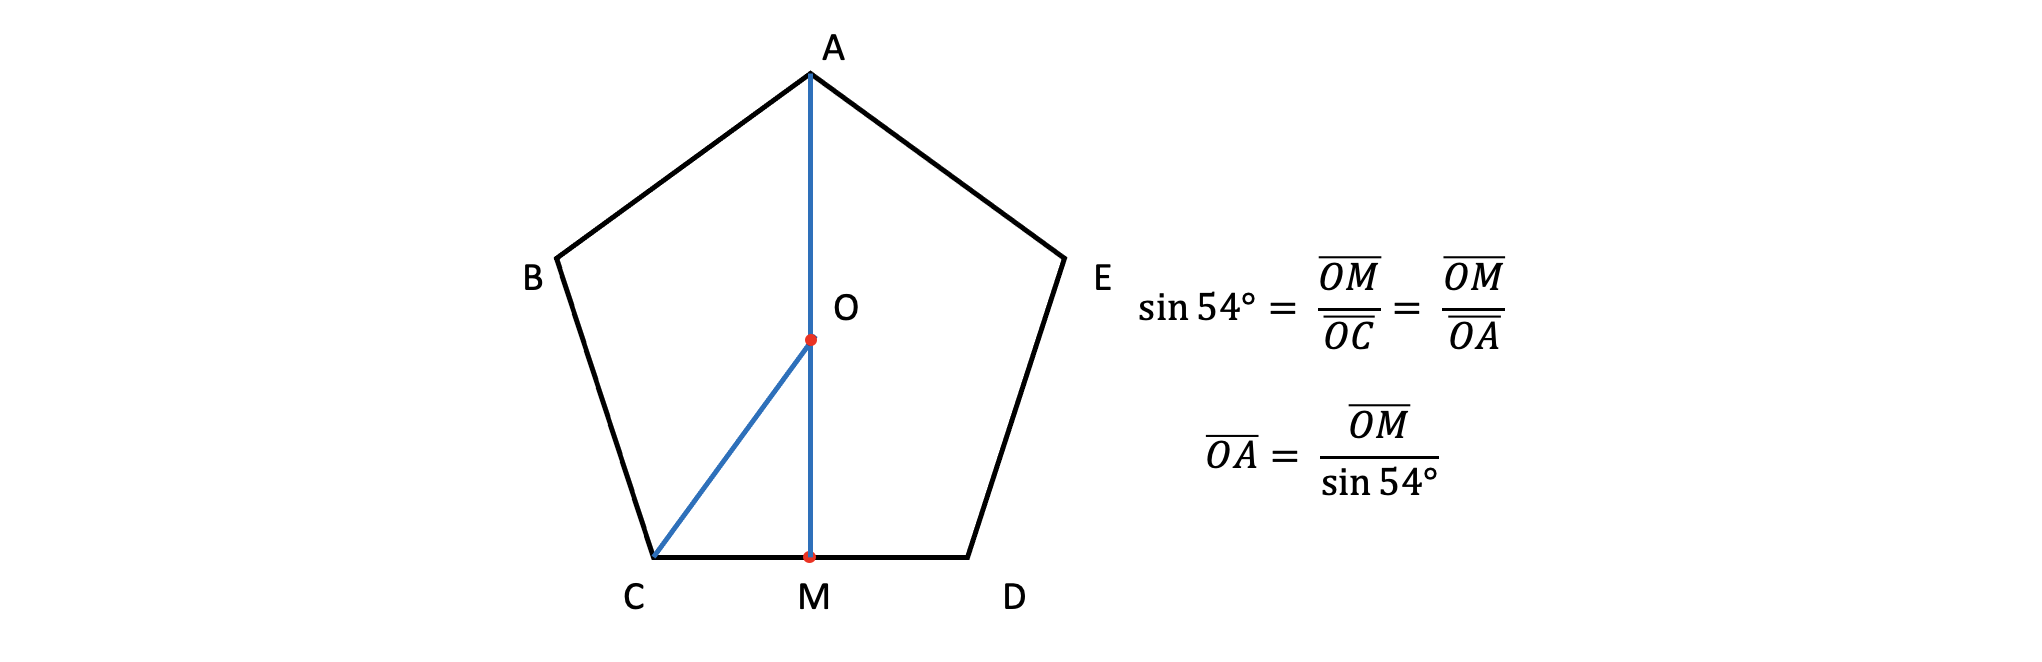

To validate the calculated point is correct, the calculation above is repeated for three times starting with the vertex B and C so that three center point is obtained. The calculated coordinates finally overlap with each other proof that the calculation is correct. 

### 2.5 Sigma between Interfaces

When considering sigma, the length of each leg will be reduced and its length can be calculated as follows.

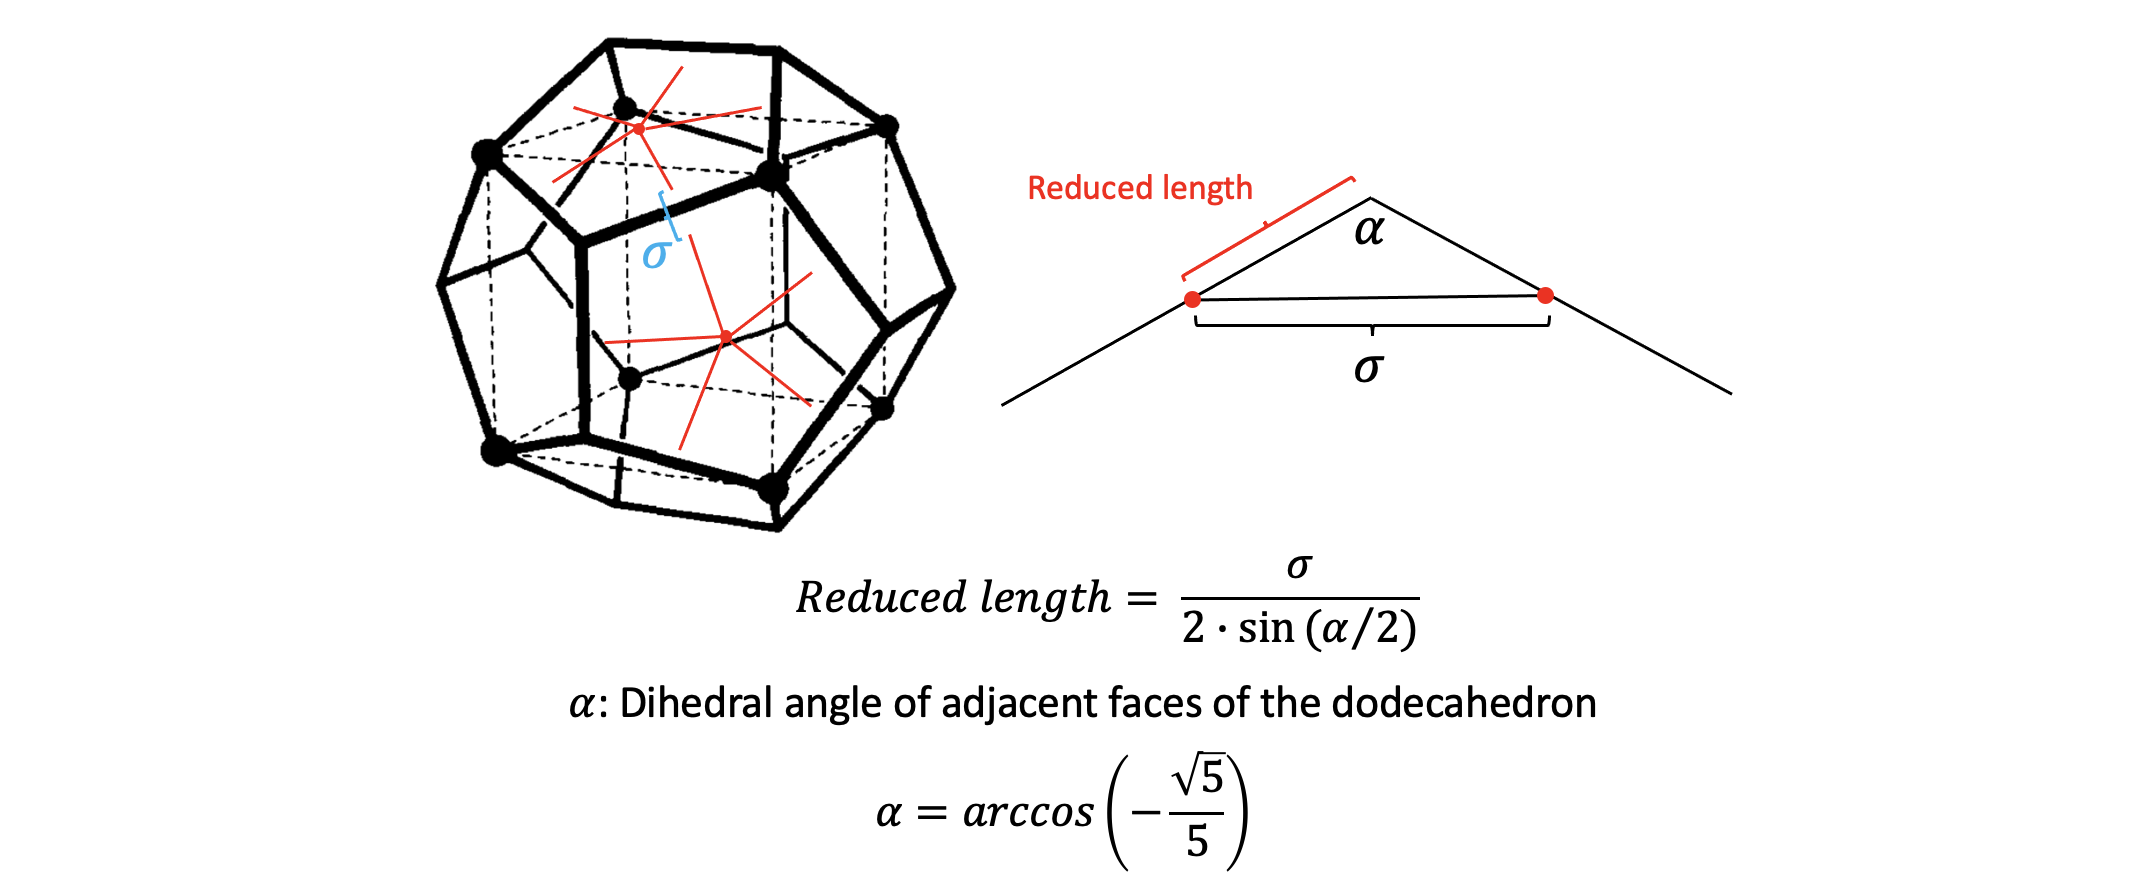

After calculating the reduced length, the coordinates of each COM and each new interface will be obtained and ready to use.

### 2.6 Binding Angle

The angle calculation is explained in detail in the SI (section II) of the NERDSS paper: 'NERDSS: A Nonequilibrium Simulator for Multibody Self-Assembly at the Cellular Scale'. It will not be repeated here.

## 3. Library Installation

The ioNERDSS library in uploaded onto the official Python Package Index (https://pypi.org/), where all information about this package can be found.

To install ioNERDSS library, simply run below in system command line:

> pip install ioNERDSS

To upgrade ioNERDSS, run below in system command line:

> pip install --upgrade ioNERDSS

## 4. Model Creation

After installing latest version of ioNERDSS package, open Jupyter Notebook or other prefered IDE, import ioNERDSS package as follows.

In [1]:
import ioNERDSS as io

Then, choose the desired Platonic solid model and run corresponding function with reasonable radius and sigma value input. The name of function is 'NameOfPlatonicSolid_Face/Vert(radius, sigma)'.

In [2]:
io.dode_face(radius = 40.0, sigma = 1.0)

File writing complete!


0

After running this function, a message indicating 'File writing complete!' will show up and two input files will be generated in the same directory with your current Python file. One is 'parm.inp' and the other is 'XXXX.mol' depending on the model used. Also, if the default built-in parameters (e.g. trajWrite, pdbWrite, onRate3Dka, offRatekb, etc.) need to be modified, users can manually change them accordingly.

Also, avoid generating multiple input files in the same path, or the older .inp file will be overwritten by the newly created one.

## 5. Running Simulation

To run the simulation, copy the 'nerdss.exe' file generated in the first step in the same directory as .inp and .mol file. Open the same directory in terminal and run command below in system command line to start simulation:

> ./nerdss -f parm.inp

## 6. Analysis Tools

There are also a number of functions for analysing the output of NERDSS. For detailed description and input requirements, please refer to the 'ioNERDSSUserGuide.doc' inside io_nerdss Github repository.

### 6.1 Analyzing  'histogram_complexes_time.dat' File

The model for the simulation results used for this analysis section below is dodecahedron with face as COM and the only modification is that onRate3Dka and offRatekb are all reduced by 10 times (from 2 to 0.2). Five paralleled simulations are made and analyzed.

The first step for analyzing a single species histogram file is to create a new SingleHistogram object.

For more information, read ``2.1.1 MAIN OBJECT – The Main Single-component Histogram Object`` in the User Guide.

*Note: If there are multiple files from multiple simulations (such as with this example), the files should be named 
[name]_1.dat, [name]_2.dat, ect. And the FileName attribute should be just [name].dat 

In [2]:
single_hist = io.SingleHistogram(FileName = "histograms\histogram_complexes_time.dat", FileNum = 6, InitialTime = 0.0, FinalTime = 1.00, SpeciesName = 'dode') 

#### 6.1.1 General Histogam

This function creates histogram of the average number of each type/size of complex species 

Important Parameters:
- None!

For more information, read ``2.2.1 HISTOGRAM – average number of each complex species size`` in the User Guide.


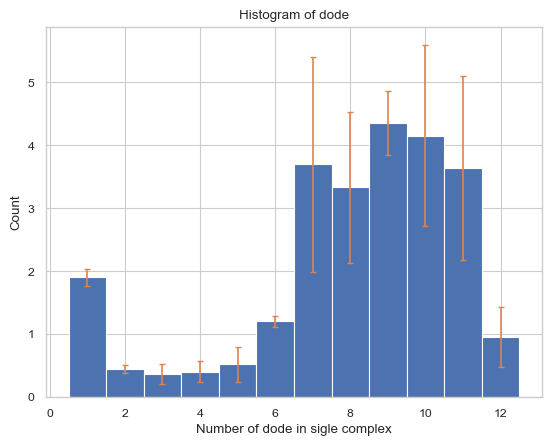

In [8]:
result = single_hist.hist_complex_count()

#### 6.1.2 Line Plot: Maximum Monomers in Single Complex vs. Time

This function creates a plot indicating maximum number of monomers in single complex molecule during a certain time period.

Important Parameters:
- ExcludeSize (int, optional): Monomers in a complex that is smaller or equal to this number will not be included.  

For more information, read ``2.1.5 LINE GRAPH – max count of protein species in a single complex at a time`` in the User Guide.


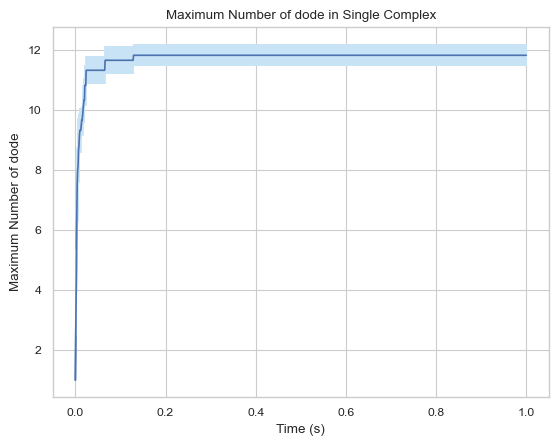

In [10]:
result = single_hist.line_max_complex_size()

#### 6.1.3 Line Plot:  Mean Monomoers in Sigle Complex vs. Time

This function creates a plot indicating mean number of monomers in single complex molecule during a certain time period.

Important Parameters:
- ExcludeSize (int, optional): Monomers in a complex that is smaller or equal to this number will not be included.  


For more information, read ``2.1.6 LINE GRAPH – mean count of protein species in a single complex at a time`` in the User Guide.

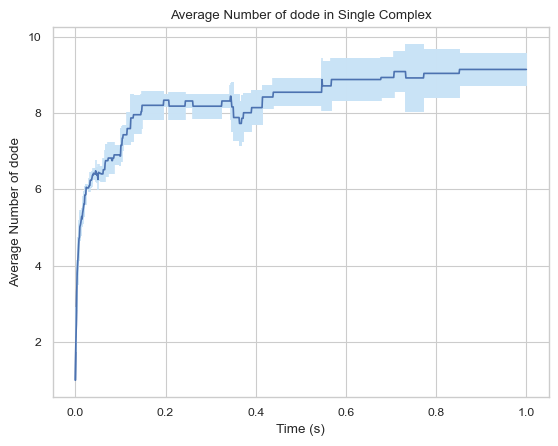

In [13]:
result = single_hist.line_mean_complex_size()

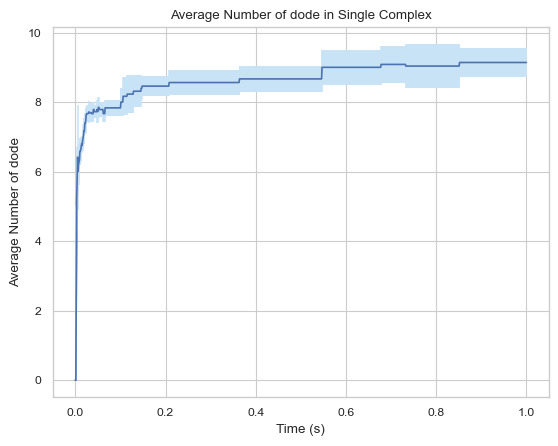

In [15]:
#creates a graph but all complexes smaller than or equal to 3 are not included
result = single_hist.line_mean_complex_size(ExcludeSize = 3)

#### 6.1.4 ‘histogram_complexes_time.dat’ to pandas.DataFrame (Single-species)

This function enables users to convert the raw histogram_complexes_time.dat file to a data frame in python pandas package for single-species system, in order to do further analysis. Each column in the data frame includes the simulation time and all occurrences of species during the simulation; each row is separated by a different simulation time.

Important Parameters:
- SaveCsv (boolean, optional):  Whether the corresponding .csv file will also be saved under
- OpName (bool, optional): Name of the saved csv. If SaveCsv is false, this attribute is irrelevent

For more information, read ``2.1.6 LINE GRAPH – mean count of protein species in a single complex at a time`` in the User Guide.

This function will run in a low speed when the number of data point is large and needs further optimization.

In [3]:
single_hist.hist_to_df(SaveCsv = False)

,Time(s):,dode: 1.,dode: 2.,dode: 3.,dode: 5.,dode: 6.,dode: 4.,dode: 8.,dode: 9.,dode: 7.,dode: 10.,dode: 11.,dode: 12.
0,0.000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.001,171.833333,11.833333,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0.002,144.833333,19.666667,4.166667,0.333333,0.166667,0.166667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,0.003,124.666667,21.666667,5.666667,0.666667,0.500000,1.500000,0.333333,0.000000,0.000000,0.000000,0.0,0.000000
4,0.004,109.833333,21.500000,6.666667,1.166667,0.666667,2.666667,0.166667,0.333333,0.333333,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.996,0.000000,0.000000,0.000000,0.166667,0.333333,0.000000,3.166667,4.500000,3.500000,4.333333,4.5,1.166667
997,0.997,0.000000,0.000000,0.000000,0.166667,0.333333,0.000000,3.166667,4.500000,3.500000,4.333333,4.5,1.166667
998,0.998,0.000000,0.000000,0.000000,0.166667,0.333333,0.000000,3.166667,4.500000,3.500000,4.333333,4.5,1.166667
999,0.999,0.000000,0.000000,0.000000,0.166667,0.333333,0.000000,3.166667,4.500000,3.500000,4.333333,4.5,1.166667


#### 6.1.5 ‘histogram_complexes_time.dat’ to CSV (Single-species)

This function enables users to convert the raw histogram_complexes_time.dat file to a seperate .csv file for a single-species system. Each column in the data frame includes the simulation time and all occurrences of species during the simulation; each row is separated by a different simulation time.

Important Parameters:
- SaveCsv (boolean, optional):  Whether the corresponding .csv file will also be saved under
- OpName (bool, optional): Name of the saved csv. If SaveCsv is false, this attribute is irrelevent

For more information, read ``2.1.4 CSV – stores count of each complex type for each timestep`` in the User Guide.

In [4]:
single_hist.hist_to_csv()

#### 6.1.6 3D-histogram vs. Time

This function enables users to generate 3D histogram representing the number of monomers in single complex as simulation time develops. The x-axis is the number of monomers, y-axis is the averaged time and z-axis is the relative occurrence probabilities.

Important Parameters:
- TimeBins: It is the number of bins that users want to divide the selected time period into. The value should be a positive integer. 
- xBarSize (Int, Optional = 1): It is the size of each data bar in x-dimension. The x-axis will be separated evenly according to this number and the count of each size range will be summed up and shown together. 

For more information, read ``2.2.2 3D HISTOGRAM – relative occurrence of each species over time`` in the User Guide.

Since Jupyter Notebook does not support 3D rotation of output images, this function is recommended to be run under a non-Jupyter Notebook IDE.

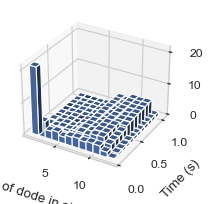

In [5]:
result = single_hist.hist_3d_complex_count(TimeBins = 12)

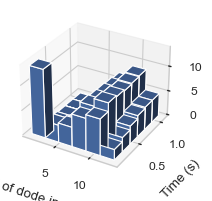

In [6]:
#Same as above but with larger data bars in the x-dimension (# of dode axis)
result = single_hist.hist_3d_complex_count(TimeBins = 6, xBarSize = 2)

#### 6.1.7 Heatmap: General Histogram Progression vs. Time

This function enables users to generate 2D histogram of numerical distribution of different N-mers vs. time. The x-axis is the distribution of number of monomers in single complex and y-axis is the time period. The color in each box indicates the number of corresponding N-mers when corresponding time period is reached.

Important Parameters:
- TimeBins: It is the number of bins that users want to divide the selected time period into. The value should be a positive integer. 
- xBarSize (Int, Optional = 1): It is the size of each data bar in x-dimension. The x-axis will be separated evenly according to this number and the count of each size range will be summed up and shown together.
- ShowMean (Bool, Optional = False): Whether the corresponding mean value will be shown in the center of each box 
- ShowStd (Bool, Optional = False): Whether the corresponding standard deviation value will be shown in the center of each box 


For more information, read ``2.2.3 HEATMAP – average number of complexes at each time interval`` in the User Guide.

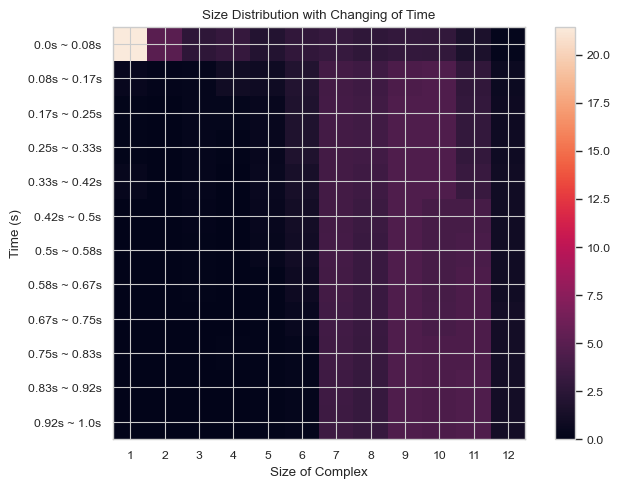

In [7]:
result = single_hist.heatmap_complex_count(TimeBins = 12)

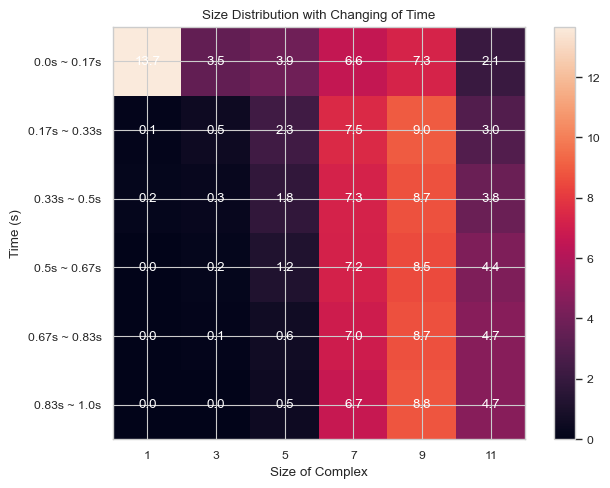

In [8]:
#same as above but with larger x steps and the mean shown
result = single_hist.heatmap_complex_count(TimeBins = 6, xBarSize = 2, ShowMean = True)

#### 6.1.8 Heatmap: Number of Total Count of Monomers inside N-mers vs. Time

This function enables users to generate 2D histogram of total count of monomers in different N-mers vs. time. The x-axis is the number of monomers in single complex and y-axis is the time period. The color in each box indicates the total number of corresponding monomers in N-mers when corresponding time period is reached.

Important Parameters:
- TimeBins: It is the number of bins that users want to divide the selected time period into. The value should be a positive integer. 
- xBarSize (Int, Optional = 1): It is the size of each data bar in x-dimension. The x-axis will be separated evenly according to this number and the count of each size range will be summed up and shown together.
- ShowMean (Bool, Optional = False): Whether the corresponding mean value will be shown in the center of each box 
- ShowStd (Bool, Optional = False): Whether the corresponding standard deviation value will be shown in the center of each box 


For more information, read ``2.2.4 HEATMAP - total count of monomers in each complex size vs. time`` in the User Guide.

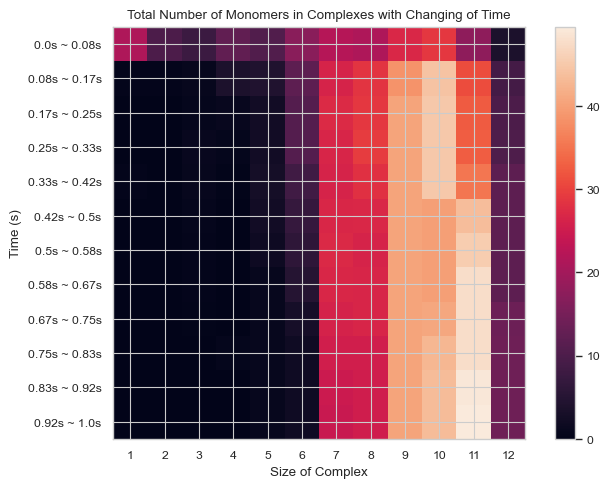

In [10]:
result = single_hist.heatmap_monomer_count(TimeBins = 12)

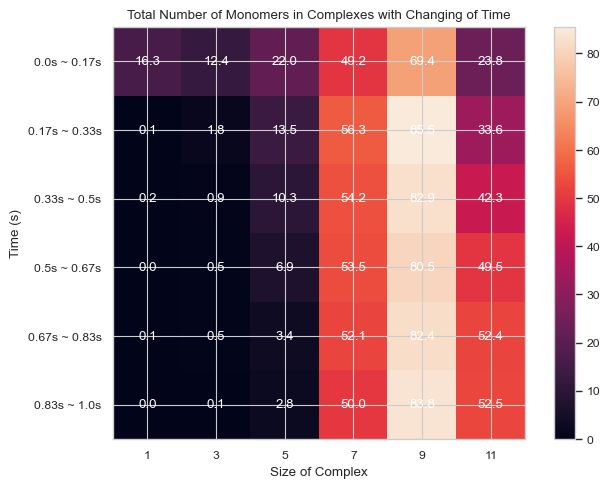

In [12]:
#same as above but with larger x steps and the mean shown
result = single_hist.heatmap_monomer_count(TimeBins = 6, xBarSize = 2, ShowMean = True)

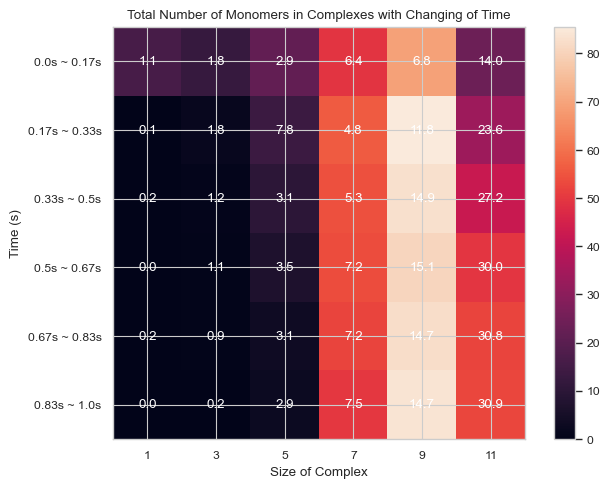

In [13]:
#same as above, but with std shown instead
result = single_hist.heatmap_monomer_count(TimeBins = 6, xBarSize = 2, ShowStd = True)

#### 6.1.9 Heatmap: Fractions of Monomers Forming N-mers vs. Time

This function enables users to generate 2D histogram of fractions of monomers forming different N-mers vs. time. The x-axis is the number of monomers in single complex and y-axis is the time period. The color in each box indicates the fraction of monomers forming corresponding N-mers when corresponding time period is reached.

Important Parameters:
- TimeBins: It is the number of bins that users want to divide the selected time period into. The value should be a positive integer. 
- xBarSize (Int, Optional = 1): It is the size of each data bar in x-dimension. The x-axis will be separated evenly according to this number and the count of each size range will be summed up and shown together.
- ShowMean (Bool, Optional = False): Whether the corresponding mean value will be shown in the center of each box 
- ShowStd (Bool, Optional = False): Whether the corresponding standard deviation value will be shown in the center of each box 


For more information, read ``2.2.5 HEATMAP - fractions of original monomers in each complex species vs. time`` in the User Guide.

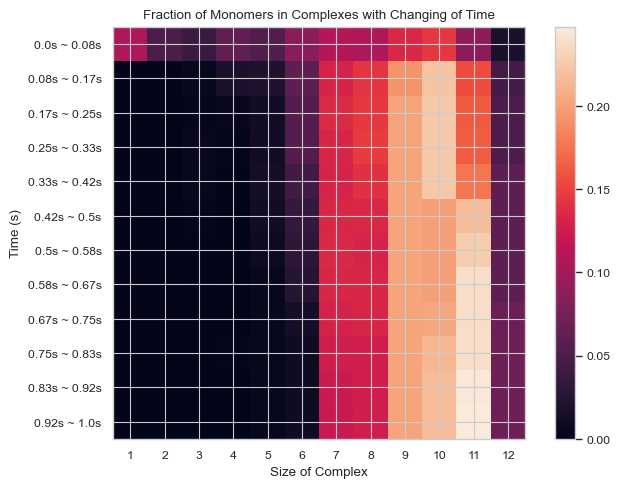

In [14]:
result = single_hist.heatmap_monomer_fraction(TimeBins = 12)

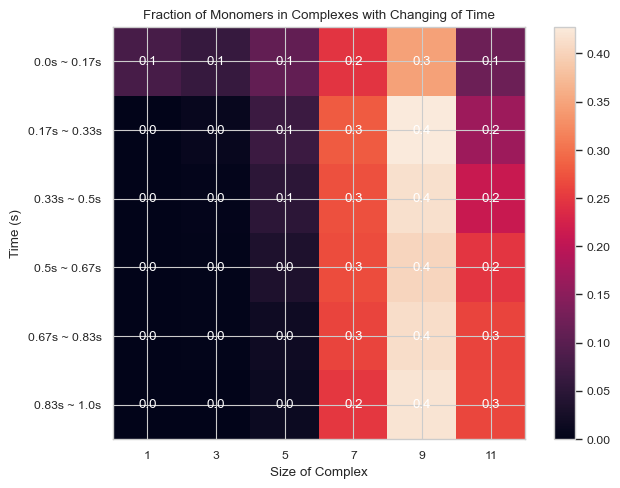

In [15]:
#same as above but with larger x steps and the mean shown
result = single_hist.heatmap_monomer_fraction(TimeBins = 6, xBarSize = 2, ShowMean = True)

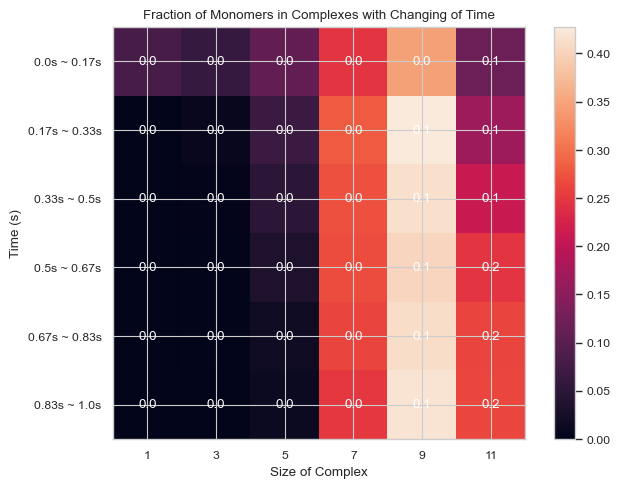

In [16]:
result = single_hist.heatmap_monomer_fraction(TimeBins = 6, xBarSize = 2, ShowStd = True)

### 6.2  Analyzing 'transition_matrix_time.dat' File

To generate 'transition_matrix_time.dat' file, users should make modifications in both '.inp' and '.mol' files. In '.inp' file, '$transitionWrite = X$' command should be included into the parameter section where $X$ refers to the number of iterations required to record the 'transition_matrix_time.dat' file each time; and in '.mol' file, '$countTransition = true$' and '$transitionMatrixSize = X$' should be included under the 'Name' variable, where X refers to the maximum size of the complex and $X = 12$ for the simulation here. Go over the 'NERDSS_USER_GUIDE' for more detailed imformation. 

The model for the simulation results used for this analysis section below is dodecahedron with face as COM and the modifications in parameter values are onRate3Dka is set as 0.2 and offRatekb is set as 200, so that a reasonable and straightforward plot can be shown.

#### 6.2.1 Line Plot: Free Energy vs. Time

The plot indicates the change in free energy in selected time period among different size of complexes. The x-axis is the size of complex and the y-axis is the free energy calculated as $-ln(P(N))$ in the unit of $k_BT$, where the $P(N)$ refers to the probability of occurrence of the number of times N-mer is counted (including association and dissociation). If multiple input files are given, the output plot will be the average value of all files and an error bar will also be included.

Important Parameters:
- None!

For more information, read ``2.4.1 LINE PLOT - calculates change in free energy among different sizes of complexes`` in the User Guide.

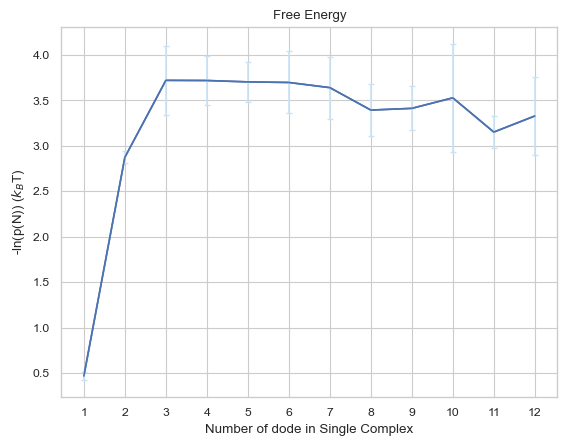

In [19]:
result = io.free_energy(FileName = 'transition\\transition_matrix_time.dat', FileNum = 5, \
                        InitialTime = 0.0, FinalTime = 1.0, SpeciesName = 'dode')

#### 6.2.2 Line Plot: Symmetric Associate Probability

This line plot represents the probability of association between complexes of different sizes and other complexes of different sizes. The x-axis is the size of the complex and y-axis is the associate probability. Three lines will exist in the line graph, representing associating to complexes of sizes less than, equal to, or greater than the specified size, respectively. 'Symmetric' in the function name means that for the associate reaction, both sizes of complexes are counted as associating events symmetrically, for example, if an associate event occurs where a trimer associates to a tetramer as a heptamer, then this event is counted twice, which are trimer associates to tetramer and tetramer associates to trimer. If multiple input files are given, the output plot will be the average value of all files and an error bar will also be included.

Important Parameters:
- DivideSize (int, optional = 2): Value that distinguishes the size of the associate complex. 

For more information, read ``2.4.2 LINE PLOT – symmetric probability of association between complex sizes`` in the User Guide.

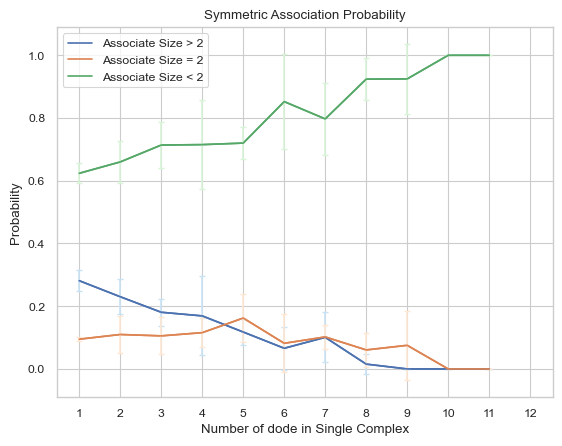

In [21]:
result = io.associate_prob_symmetric(FileName = 'transition\\transition_matrix_time.dat', \
                                     FileNum = 5, InitialTime = 0.0, FinalTime = 1.0, \
                                     SpeciesName = 'dode', DivideSize = 2)

#### 6.2.3 Line Plot: Asymmetric Associate Probability

This line plot represents the probability of association between complexes of different sizes and other complexes of different sizes. The x-axis is the size of the complex and y-axis is the associate probability. Three lines will exist in the line graph, representing associating to complexes of sizes less than, equal to, or greater than the specified size, respectively. 'Asymmetric' in the function name means that for the associate reaction, only the complexes of smaller size associating to the larger one is counted as associate event asymmetrically, for example, if an associating event occurs where a trimer associates to a tetramer as a heptamer, then this event is counted only once, which is a trimer associates to tetramer. If multiple input files are given, the output plot will be the average value of all files and an error bar will also be included.


Important Parameters:
- DivideSize (int, optional = 2): Value that distinguishes the size of the associate complex. 

For more information, read ``2.4.3 LINE PLOT - asymmetric probability of association between complex sizes`` in the User Guide.

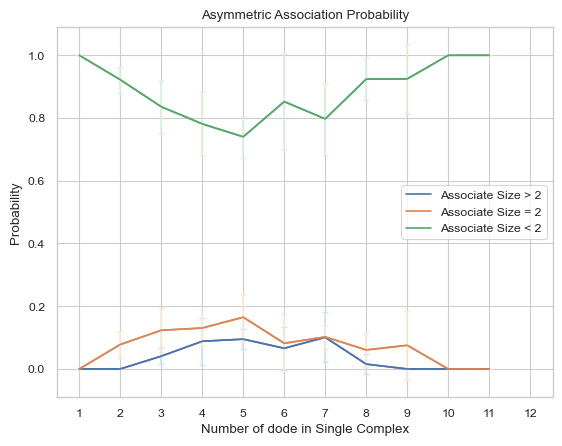

In [22]:
result = io.associate_prob_asymmetric(FileName = 'transition\\transition_matrix_time.dat', \
                                      FileNum = 5, InitialTime = 0.0, FinalTime = 1.0, \
                                      SpeciesName = 'dode', DivideSize = 2)

#### 6.2.4 Line Plot: Symmetric Dissociate Probability

This line plot represents the probability of dissociation of complexes of different sizes into other complexes of different sizes. The x-axis is the size of the complex and y-axis is the dissociate probability. Three lines will exist in the line graph, representing dissociating to complexes of sizes less than, equal to, or greater than the specified size, respectively. 'Symmetric' in the function name means that for the dissociate reaction, both sizes of complexes are counted as dissociating events symmetrically, for example, if an dissociate event occurs where a heptamer dissociates into a tetramer and a trimer, then this event is counted twice, which are heptamer dissociates to tetramer and heptamer dissociates to trimer. If multiple input files are given, the output plot will be the average value of all files and an error bar will also be included.


Important Parameters:
- DivideSize (int, optional = 2): Value that distinguishes the size of the associate complex. 

For more information, read ``2.4.4 LINE PLOT -  symmetric probability of dissociation between complex sizes`` in the User Guide.


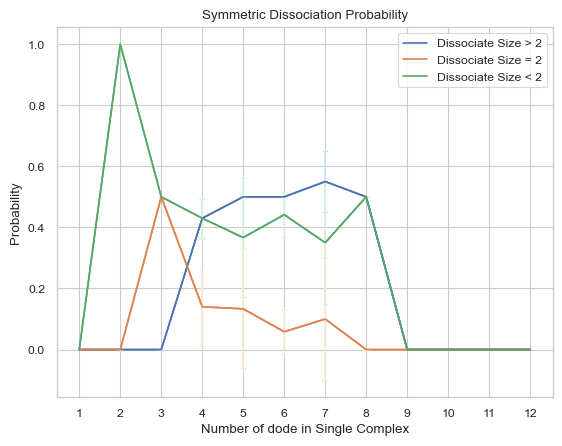

In [23]:
result = io.dissociate_prob_symmetric(FileName = 'transition\\transition_matrix_time.dat', \
                                      FileNum = 5, InitialTime = 0.0, FinalTime = 1.0, \
                                      SpeciesName = 'dode', DivideSize = 2)

#### 6.2.5 Line Plot: Asymmetric Dissociate Probability

This line plot represents the probability of dissociation of complexes of different sizes into other complexes of different sizes. The x-axis is the size of the complex and y-axis is the dissociate probability. Three lines will exist in the line graph, representing dissociating to complexes of sizes less than, equal to, or greater than the specified size, respectively. 'Asymmetric' in the function name means that for the dissociate reaction, only the complexes of smaller size dissociating from the original one is counted as dissociate event asymmetrically, for example, if an dissociate event occurs where a heptamer dissociates into a tetramer and a trimer, then this event is counted only once, which is heptamer dissociates to trimer. If multiple input files are given, the output plot will be the average value of all files and an error bar will also be included.


Important Parameters:
- DivideSize (int, optional = 2): Value that distinguishes the size of the associate complex. 

For more information, read ``2.4.5 LINE PLOT -  asymmetric probability of dissociation between complex sizes`` in the User Guide.

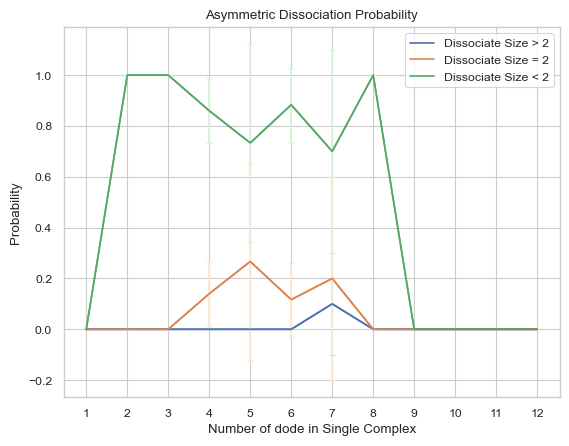

In [24]:
result = io.dissociate_prob_asymmetric(FileName = 'transition\\transition_matrix_time.dat', \
                                       FileNum = 5, InitialTime = 0.0, FinalTime = 1.0, \
                                       SpeciesName = 'dode', DivideSize = 2)

#### 6.2.6 Line Plot: Growth Probability

This line plot indicates the probability of growth in size for different sizes of complexes. The x-axis is the size of complexes, and the y-axis is the growth probability. If multiple input files are given, the output plot will be the average value of all files and an error bar will also be included.

Important Parameters:
- None!

For more information, read ``2.4.6 LINE PLOT – Growth probability for each complex size`` in the User Guide.

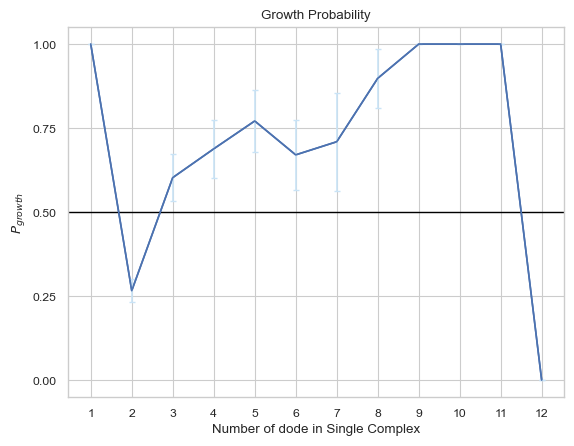

In [25]:
result = io.growth_prob(FileName = 'transition\\transition_matrix_time.dat', FileNum = 5, \
                        InitialTime = 0.0, FinalTime = 1.0, SpeciesName = 'dode')

#### 6.2.7 Line Plot: Complexes Lifetime

This line plot indicates the lifetime for different sizes of complexes. The x-axis is the size of complexes, and the y-axis is the corresponding lifetime in unit of second. If multiple input files are given, the output plot will be the average value of all files and an error bar will also be included.

Important Parameters:
- None!

For more information, read ``2.4.7 LINE PLOT – Average lifetime for each complex type`` in the User Guide.

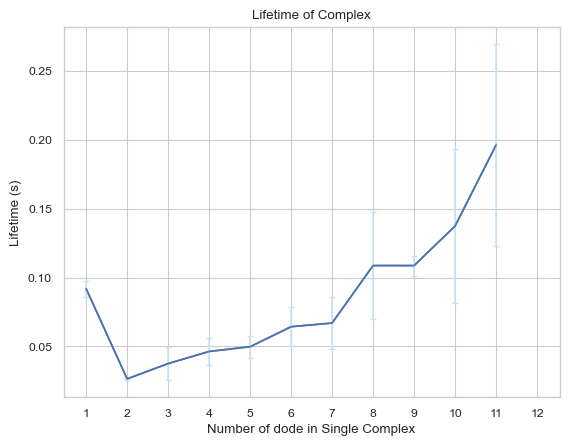

In [26]:
result = io.complex_lifetime(FileName = 'transition\\transition_matrix_time.dat', FileNum = 5, \
                             InitialTime = 0.0, FinalTime = 1.0, SpeciesName = 'dode')

### 6.3 Locate Position for Certain Size of Complex

This function enables users to locate specific complexes of certain size from either a PDB file or a 'restart.dat' file after simulation. The result will be output as a separated file named “output_file.pdb” containing only the desired complex.

#### 6.3.1 Locate Position by PDB File

Reading only the PDB file slows down the function compared to reading the 'restart.dat' file, because the function needs to calculate the distance between all reactive atoms that can be reacted based on the reaction information to determine whether they are bound or not. Therefore, this function is universal but runs slowly in time, especially when the number of reaction is large.

Important Parameters:
- NumDict:  A dictionary that holds the requested number of protein types in a complex
- BufferRatio (float, optional = 0.01): The buffer ratio used to determine whether two reaction interfaces can be considered as bonded. 
- OpName (str, optional = “output_file”): The name of the outputted file. 


For more information, read ``2.5.1 By PDB file`` in the User Guide.

In [31]:
io.locate_pos_no_restart(FileNamePdb = '9999999.pdb', NumDict = {"dod":10}, \
                        FileNameInp = 'parm.inp', BufferRatio = 0.01, OpName = "No Restart")

Reading files......
Reading files complete!
Extracting binding information......
Extracting complete!
Calculating distance......
Calculating distance for reaction # 1 ...
Calculating distance for reaction # 2 ...
Calculating distance for reaction # 3 ...
Calculating distance for reaction # 4 ...
Calculating distance for reaction # 5 ...
Calculating distance for reaction # 6 ...
Calculating distance for reaction # 7 ...
Calculating distance for reaction # 8 ...
Calculating distance for reaction # 9 ...
Calculating distance for reaction # 10 ...
Calculating distance for reaction # 11 ...
Calculating distance for reaction # 12 ...
Calculating distance for reaction # 13 ...
Calculating distance for reaction # 14 ...
Calculating distance for reaction # 15 ...
Calculation complete!
Finding complexes......
Finding complexes complete!
Filtering complexes......
Filtering complexes complete!
Writing new PDB files......
PDB writing complete! (named as No Restart.pdb)


0

#### 6.3.2 Locate Position for Certain Size of Complex by 'restart.dat' File

This function enables users to locate specific complexes of certain size from a PDB file along with ‘restart.dat’ file after simulation. The result will be output as a separated file named “output_file.pdb” containing only the desired complex.

The advantage of reading the 'restart.dat' file is that the file directly stores the binding information of each complex in the system and can be used directly, so the function runs faster; however, the function is not universal, if the 'restart.dat ' file's write logic changes, then this function will no longer work.

Important Parameters:
- NumDict:  A dictionary that holds the requested number of protein types in a complex
- BufferRatio (float, optional = 0.01): The buffer ratio used to determine whether two reaction interfaces can be considered as bonded. 
- OpName (str, optional = “output_file”): The name of the outputted file. 


For more information, read ``2.5.2 By ‘restart.dat’ file`` in the User Guide.

In [33]:
io.locate_pos_restart(FileNamePdb = '9999999.pdb', NumDict = {"dod":10}, FileNameRestart = 'restart.dat',OpName="Restart")

Reading restart.dat......
The total number of complexes is 26
Reading files complete!
Reading PDB files......
Reading files complete!
Finding complexes......
Found 5 protein complexes!
Writing new PDB files......
PDB writing complete! (named as Restart.pdb)


0